In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import py.parse_runtime as parser
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
from matplotlib import rc
# IMPORT MY LATEX SO I CAN USE \TEXTSC
import matplotlib as mpl
mpl.rc('text', **{'usetex':True})
base_dir = './'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[50, 100, 200, 400, 500, 800, 1000]
{1000: <py.parse_runtime.ScriptRunCollection object at 0x7fd984928cf8>, 800: <py.parse_runtime.ScriptRunCollection object at 0x7fd984928e10>, 200: <py.parse_runtime.ScriptRunCollection object at 0x7fd984956ba8>, 100: <py.parse_runtime.ScriptRunCollection object at 0x7fd9844d2eb8>, 50: <py.parse_runtime.ScriptRunCollection object at 0x7fd9844d2ba8>, 500: <py.parse_runtime.ScriptRunCollection object at 0x7fd9844d2940>, 400: <py.parse_runtime.ScriptRunCollection object at 0x7fd9844d2c88>}
[3.8718513999999997, 3.7267814, 3.7448102, 3.7268003999999997, 3.6015203999999996, 3.7476155999999996, 3.9393202]


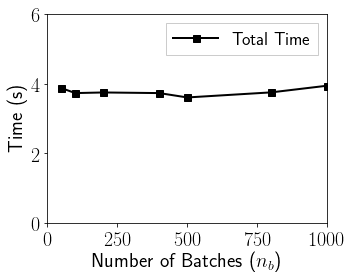

In [14]:
ifile = '2019-07-28_bs_test_out.txt'

data = parser.parse( ifile )

b_sizes = data.as_dict( 'num_batches' )
del b_sizes[ 500000 ]
print( sorted(  b_sizes.keys() ) )
print( b_sizes )
times = [ b_sizes[ item ].apply( np.mean, 'total_time' ) for item in sorted( b_sizes.keys() ) ]
print( times )
fig = plt.figure( figsize = ( 5, 4 ) )
ax1 = fig.add_subplot( 111 )

ax1.tick_params( which = 'major', labelsize = 20 )
ax1.set_xlim( 0, 1000 )
ax1.set_xticks( np.arange( 0, 1001, 250 ) )
lab1 = ax1.plot( sorted( b_sizes.keys() ), times, ls = '-', c = 'black',
                marker = 's', markersize = 7, linewidth = 2, label = "Total Time"
               )
ax1.set_ylim( 0, 6 )

ax1.set_xlabel( "Number of Batches ($n_b$)", fontsize = 20 )
ax1.set_ylabel( "Time (s)", fontsize = 20 )

lns = lab1

labs = [ l.get_label() for l in lns ]

l = ax1.legend( lns, labs, fontsize = 18, loc = 'upper right', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)

plt.tight_layout()
plt.savefig( 'mm_nb_vs_time.pdf', bbox_inches = 'tight' )

In [4]:
cache_misses_baseline = base_dir + 'output_baseline_cache_miss.txt'
cache_misses_test     = base_dir + 'output_perf_cache_miss.txt'
k_dict = parser.parse( cache_misses_baseline ).as_dict( 'k' )
misses_baseline = [ k_dict[ item ].apply( np.mean, 'cache_misses' ) for item in sorted( k_dict.keys() ) ]
k_dict = parser.parse( cache_misses_test ).as_dict( 'k' )
misses_test = [ k_dict[ item ].apply( np.mean, 'cache_misses' ) for item in sorted( k_dict.keys() ) ]

fig = plt.figure( figsize = ( 5, 4 ) )
ax = fig.add_subplot( 111 )
print( misses_baseline )
print( misses_test )

misses = list()
for index, item in enumerate( misses_baseline ):
    misses.append(  misses_test[ index ] - misses_baseline[ index ] )
smallest = min( misses )
ax.bar( range( 1, 6, 1 ), [ ( item - smallest )  for item in misses ], color = 'k' )
ax.set_ylabel( '$m_k-min$', fontsize = 25 )
ax.set_xlabel( 'Number of Sublists ($K$)', fontsize = 20 )
ax.set_xticklabels( [ 0, 2, 4, 8, 16, 32 ] )
plt.tight_layout() 
plt.savefig( 'cache_miss_increase_relative.pdf', bbox_inches = 'tight' )

{'seed': 42, 'input_size': 4000000000, 'batch_size': 1250000, 'k': 2, 'total_size': 30517.578125, 'num_batches': 1600, 'num_cpu_batches': 1600, 'num_gpu_batches': 0, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 4000000000, 'batch_size': 1250000, 'k': 4, 'total_size': 30517.578125, 'num_batches': 800, 'num_cpu_batches': 800, 'num_gpu_batches': 0, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 4000000000, 'batch_size': 1250000, 'k': 8, 'total_size': 30517.578125, 'num_batches': 400, 'num_cpu_batches': 400, 'num_gpu_batches': 0, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 4000000000, 'batch_size': 1250000, 'k': 16, 'total_size': 30517.578125, 'num_batches': 200, 'num_cpu_batches': 200, 'num_gpu_batches': 0, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load

AttributeError: 'ScriptRun' object has no attribute 'cache_misses'

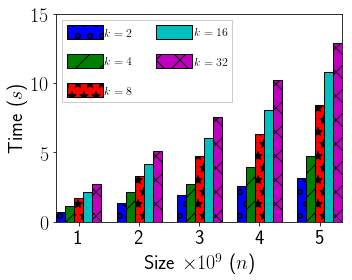

In [8]:
same_num_batches = base_dir + 'outfile_cpu_frac_1.txt'

size_dict = parser.parse( same_num_batches ).as_dict( 'input_size' )
dicts  = list()
fig = plt.figure( figsize = ( 5, 4 ) )
ax = fig.add_subplot( 111 )
ax.set_xticklabels( [ item // 1000000000 for item in size_dict.keys() ] )
size_axes_dict = {}

ax.tick_params( which = 'major', labelsize = 20 )
#ax2.tick_params( which = 'major', labelsize = 14 )

for size in size_dict:
    k_dict = size_dict[ size ].as_dict( 'k' )
    size_axes_dict[ size ] = k_dict 
    
# Lists for 2, 4, 8, 16, 32 sublists
mean_lists = [ [], [], [], [], [] ]
for size, k in size_axes_dict.items():
    for num_lists, time in k.items():
        index = int( math.log( num_lists, 2 ) ) - 1
        mean_lists[ index ].append( time.apply( np.mean, 'total_time' ) )

data = mean_lists
X = np.arange( 5 )

ax.set_xticks( X + 0.30 )

lab1 = ax.bar(X + 0.00, data[0], color = 'b', width = 0.15, label = "$k=2$", hatch = 'o', edgecolor = 'black' )
lab2 = ax.bar(X + 0.15, data[1], color = 'g', width = 0.15, label = "$k=4$", hatch = '/', edgecolor = 'black' )
lab3 = ax.bar(X + 0.30, data[2], color = 'r', width = 0.15, label = "$k=8$", hatch = '*', edgecolor = 'black' )
lab4 = ax.bar(X + 0.45, data[3], color = 'c', width = 0.15, label = "$k=16$", hatch = None, edgecolor = 'black' )
lab5 = ax.bar(X + 0.60, data[4], color = 'm', width = 0.15, label = "$k=32$", hatch = 'x', edgecolor = 'black' )

lns = lab1 + lab2 + lab3 + lab4 + lab5 
labels = [ item.get_label() for item in lns ]
#l = ax.legend( lns, labels, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
 #             handlelength = 2.5, ncol = 1)
plt.legend( loc='upper left', fontsize = 12, fancybox = False, framealpha = 1, handlelength = 3, 
            handleheight = 1.5, ncol = 2, handletextpad = 0.10, labelspacing = 1.2
          )
ax.autoscale( tight = True )
ax.set_ylim( 0, 15 )
ax.set_xlabel( 'Size $\\times 10^9$ ($n$)', fontsize = 20 )
ax.set_ylabel( 'Time ($s$)', fontsize = 20 )

plt.tight_layout()
fig.savefig( 'multiway_merge_k_vs_time_cpu_only.pdf', bbox_inches = 'tight' )
plt.show()



{'seed': 42, 'input_size': 3000000000, 'batch_size': 937500, 'k': 16, 'total_size': 22888.183594, 'num_batches': 200, 'num_cpu_batches': 94, 'num_gpu_batches': 106, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 4000000000, 'batch_size': 1250000, 'k': 32, 'total_size': 30517.578125, 'num_batches': 100, 'num_cpu_batches': 47, 'num_gpu_batches': 53, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}


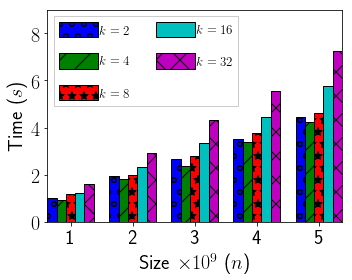

In [29]:
same_num_batches = base_dir + 'outfile_cpu_frac_0.47.txt'

size_dict = parser.parse( same_num_batches ).as_dict( 'input_size' )
dicts  = list()
fig = plt.figure( figsize = ( 5, 4 ) )
ax = fig.add_subplot( 111 )
ax.set_xticklabels( [ item // 1000000000 for item in size_dict.keys() ] )
size_axes_dict = {}

ax.tick_params( which = 'major', labelsize = 20 )
#ax2.tick_params( which = 'major', labelsize = 14 )

for size in size_dict:
    k_dict = size_dict[ size ].as_dict( 'k' )
    size_axes_dict[ size ] = k_dict 
    
# Lists for 2, 4, 8, 16, 32 sublists
mean_lists = [ [], [], [], [], [] ]
for size, k in size_axes_dict.items():
    for num_lists, time in k.items():
        index = int( math.log( num_lists, 2 ) ) - 1
        mean_lists[ index ].append( time.apply( np.mean, 'total_time' ) )

data = mean_lists
X = np.arange( 5 )

ax.set_xticks( X + 0.30 )

lab1 = ax.bar(X + 0.00, data[0], color = 'b', width = 0.15, label = "$k=2$", hatch = 'o', edgecolor = 'black' )
lab2 = ax.bar(X + 0.15, data[1], color = 'g', width = 0.15, label = "$k=4$", hatch = '/', edgecolor = 'black' )
lab3 = ax.bar(X + 0.30, data[2], color = 'r', width = 0.15, label = "$k=8$", hatch = '*', edgecolor = 'black' )
lab4 = ax.bar(X + 0.45, data[3], color = 'c', width = 0.15, label = "$k=16$", hatch = None, edgecolor = 'black' )
lab5 = ax.bar(X + 0.60, data[4], color = 'm', width = 0.15, label = "$k=32$", hatch = 'x', edgecolor = 'black' )

lns = lab1 + lab2 + lab3 + lab4 + lab5 
labels = [ item.get_label() for item in lns ]
#l = ax.legend( lns, labels, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
 #             handlelength = 2.5, ncol = 1)
plt.legend( loc='upper left', fontsize = 13, fancybox = False, framealpha = 1, handlelength = 3, 
            handleheight = 1.5, ncol = 2, handletextpad = 0.10, labelspacing = 1.2
          )
ax.autoscale( tight = True )
ax.set_ylim( 0, 9 )
ax.set_xlabel( 'Size $\\times 10^9$ ($n$)', fontsize = 20 )
ax.set_ylabel( 'Time ($s$)', fontsize = 20 )

plt.tight_layout()
fig.savefig( 'multiway_merge_k_vs_time_0.47.pdf', bbox_inches = 'tight' )
plt.show()



{'seed': 42, 'input_size': 3000000000, 'batch_size': 937500, 'k': 16, 'total_size': 22888.183594, 'num_batches': 200, 'num_cpu_batches': 94, 'num_gpu_batches': 106, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
{'seed': 42, 'input_size': 4000000000, 'batch_size': 1250000, 'k': 32, 'total_size': 30517.578125, 'num_batches': 100, 'num_cpu_batches': 47, 'num_gpu_batches': 53, 'total_time': None, 'time_cpu_only': None, 'time_gpu_only': None, 'load_imbalance': None}
[[0.5618638, 0.5304608, 0.4781896, 0.4732514, 0.48322539999999997], [0.31169840000000004, 0.3697806, 0.2747284, 0.33882160000000006, 0.32762060000000004], [0.1920002, 0.0774138, 0.041260200000000004, 0.05134019999999999, 0.0367208], [0.025049599999999998, 0.1005266, 0.18970675, 0.1774022, 0.24616219999999997], [0.15202339999999998, 0.25077, 0.33522900000000005, 0.266374, 0.302851]]


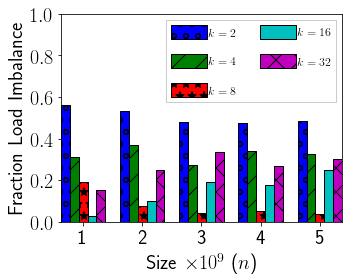

In [34]:
same_num_batches = base_dir + 'outfile_cpu_frac_0.47.txt'

size_dict = parser.parse( same_num_batches ).as_dict( 'input_size' )
dicts  = list()
fig = plt.figure( figsize = ( 5, 4 ) )
ax = fig.add_subplot( 111 )
ax.set_xticklabels( [ item // 1000000000 for item in size_dict.keys() ] )
size_axes_dict = {}

ax.tick_params( which = 'major', labelsize = 20 )
#ax2.tick_params( which = 'major', labelsize = 14 )

for size in size_dict:
    k_dict = size_dict[ size ].as_dict( 'k' )
    size_axes_dict[ size ] = k_dict 
    
# Lists for 2, 4, 8, 16, 32 sublists
mean_lists = [ [], [], [], [], [] ]
for size, k in size_axes_dict.items():
    for num_lists, time in k.items():
        index = int( math.log( num_lists, 2 ) ) - 1
        mean_lists[ index ].append( time.apply( np.mean, 'load_imbalance' ) )

data = mean_lists
print( data )
X = np.arange( 5 )

ax.set_xticks( X + 0.30 )

lab1 = ax.bar(X + 0.00, data[0], color = 'b', width = 0.15, label = "$k=2$", hatch = 'o', edgecolor = 'black' )
lab2 = ax.bar(X + 0.15, data[1], color = 'g', width = 0.15, label = "$k=4$", hatch = '/', edgecolor = 'black' )
lab3 = ax.bar(X + 0.30, data[2], color = 'r', width = 0.15, label = "$k=8$", hatch = '*', edgecolor = 'black' )
lab4 = ax.bar(X + 0.45, data[3], color = 'c', width = 0.15, label = "$k=16$", hatch = None, edgecolor = 'black' )
lab5 = ax.bar(X + 0.60, data[4], color = 'm', width = 0.15, label = "$k=32$", hatch = 'x', edgecolor = 'black' )

lns = lab1 + lab2 + lab3 + lab4 + lab5 
labels = [ item.get_label() for item in lns ]
#l = ax.legend( lns, labels, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
 #             handlelength = 2.5, ncol = 1)
plt.legend( loc='upper right', fontsize = 12, fancybox = False, framealpha = 1, handlelength = 3, 
            handleheight = 1.5, ncol = 2, handletextpad = 0.10, labelspacing = 1.2
          )
ax.autoscale( tight = True )
ax.set_ylim( 0, 1 )
ax.set_xlabel( 'Size $\\times 10^9$ ($n$)', fontsize = 20 )
ax.set_ylabel( 'Fraction Load Imbalance', fontsize = 20 )

plt.tight_layout()
fig.savefig( 'multiway_merge_k_vs_load_imbalance.pdf', bbox_inches = 'tight' )
plt.show()



{1000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f8575c19f98>, 2000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f8575c19dd8>, 3000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f8575c19e80>, 4000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f857576f828>, 5000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f857576f908>}
{1000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f857601e630>, 2000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f857af81a90>, 3000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f857adbb240>, 4000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f8575c19a20>, 5000000000: <py.parse_runtime.ScriptRunCollection object at 0x7f8575c19d30>}


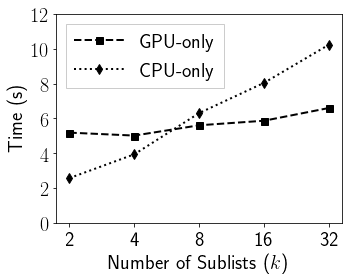

In [4]:
input_gpu = base_dir + 'outfile_cpu_frac_0.txt'
input_cpu = base_dir + 'outfile_cpu_frac_1.txt'

gpu_size_dict = parser.parse( input_gpu ).as_dict( 'input_size' )
gpu_k_dict = gpu_size_dict[ 4000000000 ].as_dict( 'k' )

cpu_size_dict = parser.parse( input_cpu ).as_dict( 'input_size' )
cpu_k_dict = cpu_size_dict[ 4000000000 ].as_dict( 'k' )

print( gpu_size_dict )
print( cpu_size_dict)

cpu_times =  [ cpu_k_dict[ k ].apply( np.mean, 'time_cpu_only' ) for k in cpu_k_dict.keys() ]
gpu_times = [ gpu_k_dict[ k ].apply( np.mean, 'time_gpu_only' ) for k in gpu_k_dict.keys() ]

x = np.arange( 5 )
fig = plt.figure( figsize = ( 5, 4 ) )
ax = fig.add_subplot( 111 )
ax.set_xticks( x )
ax.set_xticklabels( [ 2, 4, 8, 16, 32 ] )

ax.set_xlabel( 'Number of Sublists ($k$)', fontsize = 20)
ax.set_ylabel( 'Time (s)', fontsize = 20)
ax.set_ylim( 0, 12 )
ax.set_yticks( [ 0, 2, 4, 6, 8, 10, 12 ] )
ax.tick_params( which = 'major', labelsize = 20 )
lab1 = ax.plot( x, gpu_times, ls = 'dashed', c = 'black', marker = 's', 
                markersize = 7, linewidth = 2, label = "GPU-only")
lab2 = ax.plot( x, cpu_times, ls = 'dotted', c = 'black', marker = 'd',
                markersize = 7, linewidth = 2, label = "CPU-only" )

lns = lab1 + lab2
labs = [ l.get_label() for l in lns ]
l = ax.legend( lns, labs, fontsize = 20, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)

plt.tight_layout()
fig.savefig( 'multiway_merge_cpu_vs_gpu_times_k.pdf', bbox_inches = 'tight' )

{1000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc163a5bac8>, 2000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc163a5bc18>, 3000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc16375f9e8>, 4000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc163242358>, 5000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc1632426d8>}
{1000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc163c7ec88>, 2000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc168fcf8d0>, 3000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc168fcfac8>, 4000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc16375f198>, 5000000000: <py.parse_runtime.ScriptRunCollection object at 0x7fc16375f128>}
[2.5712876, 3.9381880000000002, 6.3072973999999995, 8.0450312, 10.239616000000002]
[5.1832084, 5.0139014, 5.6053896000000005, 5.8672522, 6.5992863999999996]


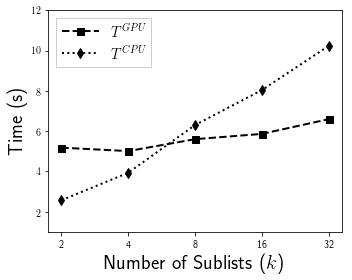

In [15]:
input_gpu = base_dir + 'outfile_cpu_frac_0.txt'
input_cpu = base_dir + 'outfile_cpu_frac_1.txt'

gpu_size_dict = parser.parse( input_gpu ).as_dict( 'input_size' )
gpu_k_dict = gpu_size_dict[ 4000000000 ].as_dict( 'k' )

cpu_size_dict = parser.parse( input_cpu ).as_dict( 'input_size' )
cpu_k_dict = cpu_size_dict[ 4000000000 ].as_dict( 'k' )

print( gpu_size_dict )
print( cpu_size_dict)

cpu_times =  [ cpu_k_dict[ k ].apply( np.mean, 'time_cpu_only' ) for k in cpu_k_dict.keys() ]
gpu_times = [ gpu_k_dict[ k ].apply( np.mean, 'time_gpu_only' ) for k in gpu_k_dict.keys() ]
print( cpu_times )
print( gpu_times )
x = np.arange( 5 )
fig = plt.figure( figsize = ( 5, 4 ) )
ax = fig.add_subplot( 111 )
ax.set_xticks( x )
ax.set_xticklabels( [ 2, 4, 8, 16, 32 ] )

ax.set_xlabel( 'Number of Sublists ($k$)', fontsize = 20)
ax.set_ylabel( 'Time (s)', fontsize = 20)
ax.set_ylim( 1, 12 )
lab1 = ax.plot( x, gpu_times, ls = 'dashed', c = 'black', marker = 's', 
                markersize = 7, linewidth = 2, label = "$T^{GPU}$")
lab2 = ax.plot( x, cpu_times, ls = 'dotted', c = 'black', marker = 'd',
                markersize = 7, linewidth = 2, label = "$T^{CPU}$")

lns = lab1 + lab2
labs = [ l.get_label() for l in lns ]
l = ax.legend( lns, labs, fontsize = 15, loc = 'upper left', fancybox = False, framealpha = 1,
              handlelength = 2.5, ncol = 1)

plt.tight_layout()
fig.savefig( 'multiway_merge_cpu_vs_gpu_separate_times_k_3.pdf', bbox_inches = 'tight' )